In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import metrics

In [109]:
cal=pd.read_csv('/kaggle/input/calories-and-exercise/calories.csv') #IMPORTING DATAFRAMES
ex=pd.read_csv('/kaggle/input/calories-and-exercise/exercise.csv')
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [110]:
ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [111]:
df=pd.concat([ex,cal['Calories']],axis=1) #COMBINING BOTH DATAFRAMES
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [112]:
df.shape #CHECKING NUMBER OF ROWS AND COLUMNS

(15000, 9)

In [113]:
df.isnull().sum() #CHECKING NULL VALUES

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [114]:
df.describe() #STATISTICAL ANALYSIS

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: xlabel='Gender', ylabel='count'>

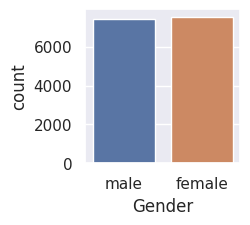

In [115]:
sns.set() #VISUALIZING DATA
plt.figure(figsize=(2,2))
sns.countplot(data=df,x='Gender')

<Axes: xlabel='Age', ylabel='Count'>

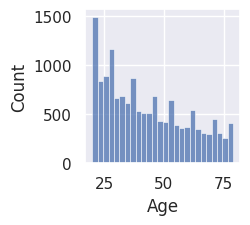

In [116]:
plt.figure(figsize=(2,2))
sns.histplot(df['Age'])

<Axes: xlabel='Height', ylabel='Count'>

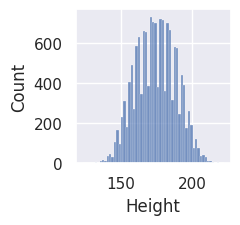

In [117]:
plt.figure(figsize=(2,2))
sns.histplot(df['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

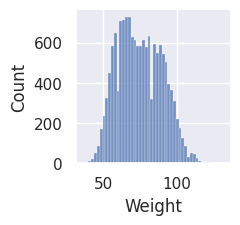

In [118]:
plt.figure(figsize=(2,2))
sns.histplot(df['Weight'])

In [119]:
df.replace({'Gender':{'female':0,'male':1}},inplace=True) #CHANGING GENDER FROM CATEGORICAL TO NUMERICAL COLUMN
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

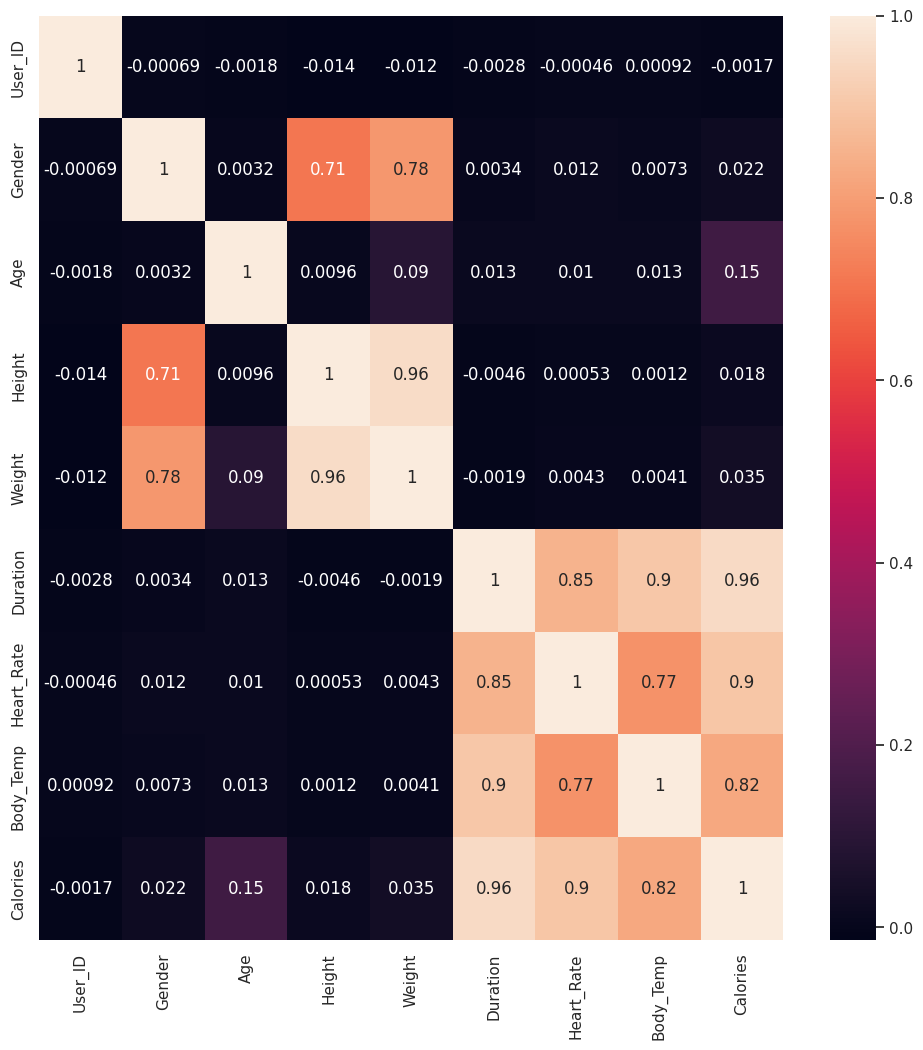

In [120]:
plt.figure(figsize=(12,12)) #CHECKING CORRELATION
sns.heatmap(df.corr(),annot=True)

In [121]:
#TRAIN TEST SPLIT
x=df.drop(columns=['User_ID','Calories'],axis=1)
y=cal.drop(columns='User_ID',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.2)

In [122]:
print(x.shape,xtrain.shape,xtest.shape)

(15000, 7) (12000, 7) (3000, 7)


In [123]:
#MACHINE LEARNING
model=XGBRegressor()
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [124]:
pred=model.predict(xtest) #PREDICTION
print(pred)
print(ytest)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]
       Calories
7592      127.0
3551      224.0
9698       38.0
3759        6.0
2353      137.0
...         ...
8859      177.0
2886       49.0
14357     145.0
9430       24.0
11870      90.0

[3000 rows x 1 columns]


In [125]:
#CHECKING DEVIATION
print(metrics.mean_absolute_error(ytest,pred))

1.4807048829992613


In [ ]:
#PREDICTION MODEL
gen=int(input('Enter Gender (0 for female | 1 for male)='))
age=int(input('Enter age='))
ht=float(input('Enter height (in cm)='))
wt=float(input('Enter height (in kg)='))
time=float(input('Enter Duration)='))
hr=float(input('Enter Heart Rate='))
bt=float(input('Body Temperature='))
t=(gen,age,ht,wt,time,hr,bt)
nparr=np.asarray(t)
nparr=nparr.reshape(1,-1)
model.predict(nparr)

In [ ]:
#SAVING MODEL USING PICKLE
import pickle
with open('calorie burn','wb') as f:
    pickle.dump(model,f)

In [ ]:
with open('calorie burn','rb') as f:
    mp=pickle.load(f)
gen=int(input('Enter Gender (0 for female | 1 for male)='))
age=int(input('Enter age='))
ht=float(input('Enter height (in cm)='))
wt=float(input('Enter height (in kg)='))
time=float(input('Enter Duration)='))
hr=float(input('Enter Heart Rate='))
bt=float(input('Body Temperature='))
t=(gen,age,ht,wt,time,hr,bt)
nparr=np.asarray(t)
nparr=nparr.reshape(1,-1)
mp.predict(nparr)